## 추천시스템 심화_사전과제_안가은

### 1.모델 기반 협업 필터링

#### 1-1. 잠재요인과 행렬 분해
(1) 잠재요인 (Latent Factor, LF)
* 정의: 사용자-아이템 상호작용 행렬에 숨겨져있는, 사용자의 취향이나 아이템의 특성을 설명하는 숨겨진 차원.
* 특징: 벡터 값을 보고 사람이 명시적으로 이해할 수 없다. 간접적으로 파악만 가능
* 두 잠재요인 벡터(ex. 사용자벡터와 아이템 벡터)의 내적이 결과값(평점)이 된다.

(2) 행렬 분해(Matrix Factorization, MF)
* 정의: 평점행렬 $R_{m\times{n}}$이 사용자의 취향 벡터 $P_{m\times{k}}$와 아이템의 특성벡터$Q^T_{k\times{n}}$의 내적으로 설명될 수 있다는 가설로부터, 관측된 평점을 가장 잘 재현하는 가장 **적절한 잠재요인의 개수 K**를 찾고, $P$와 $Q^T$의 곱이 $R$이 되도록 두 행렬을 학습시키는 것.

(3) 행렬 분해 방식
1. SVD, 특이값 분해
   * 정방행렬이 아니어도 $A={U}\sum{V^T}$ 로 분해할 수 있는 방법
   * A=사용자-아이템 평점 행렬
   * U=사용자 관련 정보 직교행렬
   * $\sum$=대각행렬(주대각성분이 A의 특이값 내림차순이다)
        + 특이값의 의미: 각 특이값은 해당 잠재요인이 원래 행렬 A에서 얼마나 많은 정보량 또는 중요도를 설명하는지를 나타낸다.
        + 추천시스템에서의 중요성: 상위 k개의 큰 특이값과 고유벡터를 사용하여 원래 행렬의 핵심 패턴을 효율적으로 압축할 수있다.
   * $v^T$=아이템 관련 정보 직교행렬
   * 한계: 데이터 희소성 처리 불가(결측치 많은 경우), 계산 복잡성

> * 모든 특이값과 고유벡터를 사용하는 **Full SVD(완전 특이값 분해)**와 상위 k개만 사용하는 **Truncated SVD(절단 특이값 분해)**로 나눌 수 있다.
> * Full SVD는 계산 비용이 크고 노이즈를 포함하므로, 행렬을 k차원으로 근사한 Truncated sVD를 사용하는 경우가 많다.

> * SVD이용한 MF구현
> 1. 결측치 처리: 비어있는 평점(결측치)를 평균 평점 등으로 채워 행렬 A 완성
> 2. SVD 수행
> 3. 차원 축소: k개의 특이값 선택후 이에 해당하는 각 부분행렬 $U_k$와 $V_k^T$ 추출
> 4. 잠재 요인 추출: 두 행렬의 내적으로 예측평점 계산

2. SGD (Stochastic Gradiendt Descent): SVD 행렬의 한계때문에 고안됨
* 목표: 목적함수
* 목적함수: 관측된 평점과 예측 평점 사이의 오차를 최소화 하는 것이 목적. 오차의 제곱합을 최소화 & 과적합 방지 위한 정규화 항 추가함

> * SGD 이용한 MF 구현
> 1. 초기화: P와 $Q^T$를 작은 무작위 값으로 초기화
> 2. 반복 학습(Epochs): 에포크 수 만큼 모든 관측 평점 순회
> 3. 오차 계산: 현재의 사용자 벡터와 아이템 벡터로 예측 평점을 내고, 관측평점-예측평점 오차를 계산함
> 4. 잠재 벡터 업데이트: 위의 오차를 줄이는 방향으로 사용자 벡터와 아이템 벡터를 경사 하강법 이용해 업데이트

3. NMF (Non-Negatice Matrix Factorization)
* 정의: P와$Q^T$의 모든 원소가 0 이상이어야 한다는 제약 조건을 추가한 행렬 분해 기법. 대부분의 현실데이터가 음수일 수 없다는 점 이용,
* 장점: 직관적 의미 부여 가능 (각 잠재요인 값이 유저의 선호도 or 아이템의 특성 강도를 나타낸다고 직관적으로 해석할 수 있음)

> * NMF를 이용한 MF구현
> 1. 초기화: P와 $Q^T$를 비음수 무작위 값으로 초기화
> 2. 최적화: 일반적인 경사 하강법 대신, 비음수 제약 조건을 유지하며 목적함수 최소화 하는 곱셈 업데이트 규칙(특수 알고리즘) 사용하여 두 행렬 반복 업데이트
> 3. 결과: 직관적으로 해석 가능

4. PMF (Probabilistic Factorization)
* 목표: 누가 무엇을 좋아할지 예측
* 확률적 모델로 접근하여, 예를 들어 평점이 4.3, 표준편차 0.2 정도 될것 같다는 식으로 불확실성 포함함
* 베이지안 추론 기밥과 결합되어 더 정교한 추천 모델이 됨

### 2. 최근 추천시스템의 방향성

#### 2.1 VAE 기반 협업 필터링 (Variational Autoencoder CF)
* 정의: 사용자의 아이템 상호작용 벡터를 입력으로 받아 잠재 공간에서 재구성하도록 VAE를 학습하는 방식.
* 장점: 기존 MF 처럼 단일 포인트 벡터가 아닌 확률적 잠재 분포라서 불확실성을 반영 가능, 희소한 상호작용 데이터에서도 좋음

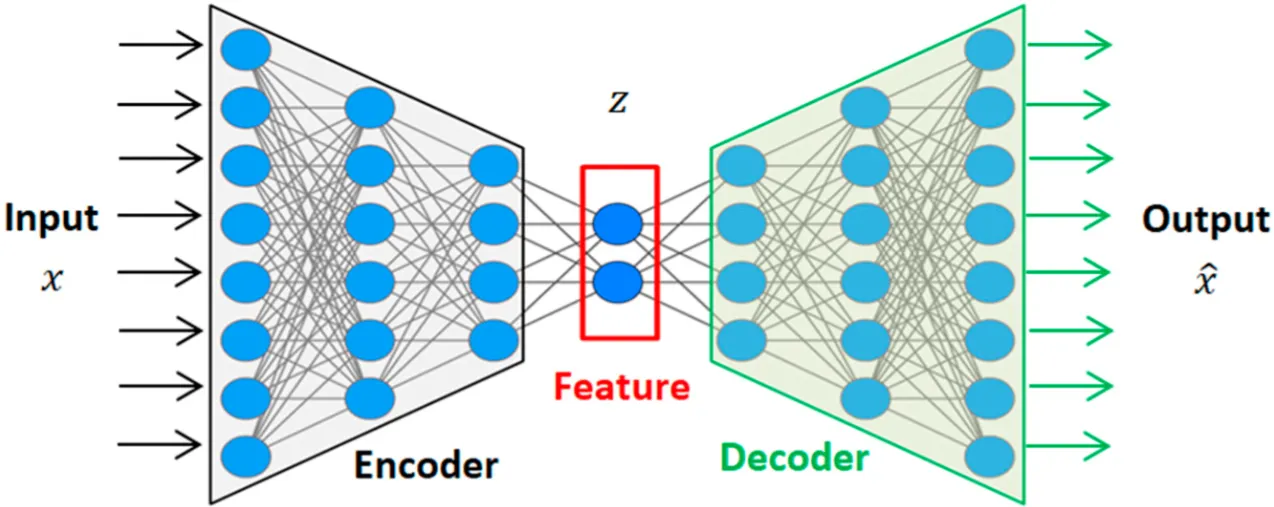

> * 구조
> * 인코더: 사용자 이력 잠재변수 z 분포로 매핑
> * 디코더: z로부터 아이템 분포 복원

1. MF의 한계와 딥러닝의 등장
   * MF가 희소성과 확장성 문제 해결했으나, 근본적으로 내적으로만 이루어지고 단일 벡터값을 사용하므로 모델링의 한계가 있다
   * 따라서 비선형 활성화 함수 가진 신경망을 사용할 수있고, 확률 분포로 불확실성을 반영할 수 있는 딥러닝이 고안됨

2. 왜 AE가 아닌 VAE인가
* AE는 단일 값을 추정하므로 데이터가 부족하면 틀리기 쉬움(불안정)
* VAE는 분포를 추정하므로 불확실성(오차 범위)을 모델링에 포함시켜 안정성을 줌

3. VAE의 우수성: 목적함수와 KL Divergence

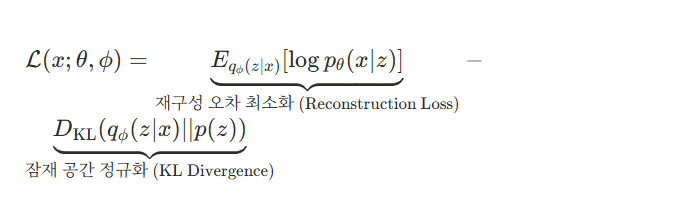

> 1. 재구성 오차 최소화 항: 디코더가 잠재벡터 z 사용해 원래 입력 x와 최대한 비슷하게 복원하도록 만듦
> 2. KL Divergence 항: 인코더가 출력하는 잠재분포 q(z|x)가 사전분포 p(z)와 유사하도록 강제함 -> 모델이 특정 데이터에 과적합하는 것을 방지해 잠재공간 넓고 부드럽게 만듦

* KL Divergence의 역할: 희소한 데이터여도(데이터가 부족한 유저) 유저 벡터들이 **표준 정규 분포 주변**에 유지하도록 만든 잠재 벡터 공간의 분포 덕분에, 자연스럽게 정보를 **보간**할 수 있음 -> VAE가 희소 데이터에 강한 이유!

* VAE-CF의 주요 장점 정리
  1. 확률적 잠재 분포 모델링 (불확실성 반영)
  2. 희소한 상호작용 데이터에서도 강건함 (보간 능력 뛰어남)
  3. 비선형성 학습 (신경망 구조여서) 

#### 2.2 GNN 기반 사용자 선호 예측 (Graphic Neural Network)
(1) GNN: 사용자-아이템 상호작용을 서로가 연결된 거대한 관계망을 형성한다고 봄 -> 그래프
   * 그래프: 노드(개체)와 엣지(개체간 관계나 상호작용)로 구성한 자료구조
    + 관계, 상호작용 같은 추상적 개념을 명시적 데이터로 구조화 가능(노드-엣지-노드)
    + non-euclidean space 표현, 학습 가능 -> 복잡하고 불규칙한 데이터 모델링

(2) GNN의 작동 구조
* 핵심 아이디어: 내 이웃 노드(나와 비슷한 사용자, 내가 본 아이템)의 정보를 나에게 전달, 요약 (message passing)

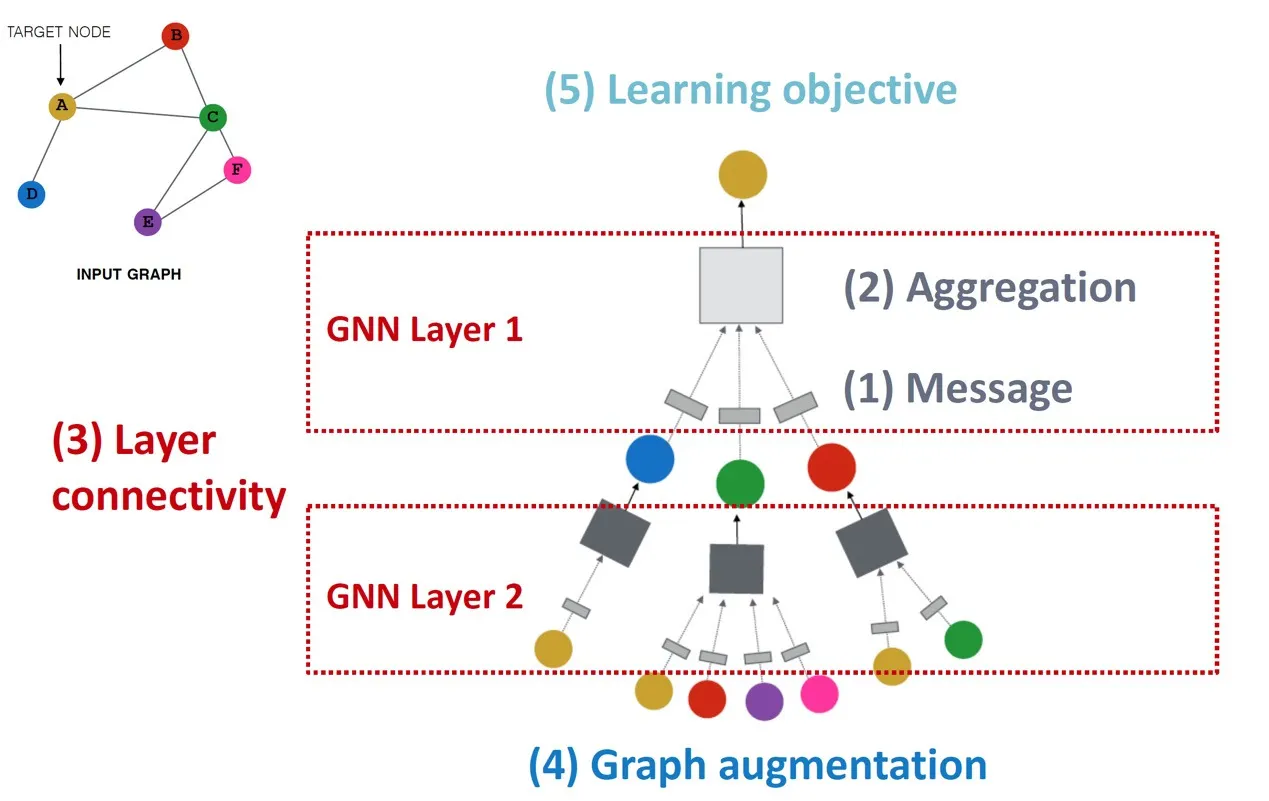

1. 그래프 구조 생성
   * 노드와 엣지를 정의한 후, 각각의 피처를 담아 표현함


2. 메시지 패싱
   * 메시지: 각 노드가 이웃에게 보내는 자신의 정보(임베딩)
   * 노드간 정보를 전달하고 상호작용하는 방법
   * 하나의 GNN레이어에서 '메세지 생성-집계-갱신'의 세 단계 이루어짐
   * 레이어 개수만큼 위 과정 반복

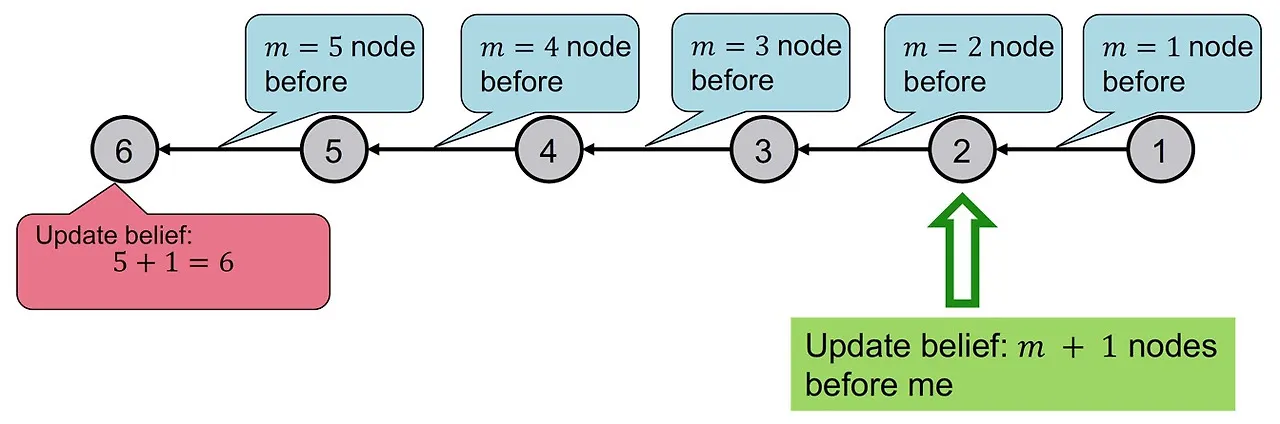

> 1. 타겟 노드(정보를 갱신하려는 노드) 선정: v
> 2. 메시지 생성: v의 이웃에게 전달할 메시지 생성 (메시지 함수)
> 3. 메시지 집계(aggregation): v의 이웃노드들의 임베딩을 하나의 벡터로 통합 (mean, max 등)
> 4. 갱신(update): v노드의 원래 임베딩과 집계된 이웃 임베딩을 결합해 새로운 임베딩 계산
> * 이 과정을 r번 반복하여 더 멀리 있는 이웃의 정보를 반영하게 된다.

(3) Light GCN (Light Graph Convolution Networks)
* GCN: GNN의 아키텍처 중 하나로, 그래프 위에서 합성곱(convolution)연산을 수행. 이웃노드와 타켓노드에 동일한 파라미터 적용함.
* Light GCN: GCN에서 2가지 요소를 제거해 복잡한 연산이 순수한 관계 정보 왜곡하는 것을 방지
  1. 특징 변환 제거: 레이어마다 복잡했던 학습 파라미터 삭제
  2. 비선형 활성화 함수 제거: relu같은 활성화함수 사용하지 않고 이웃 정보 합침 -> 정규화도니 합 혹은 평균을 사용함        
=> 즉 light GCN은 오직 **정규화된 이웃 임베딩의 합**만으로 구성되어 매우 가볍고 효율이 좋다

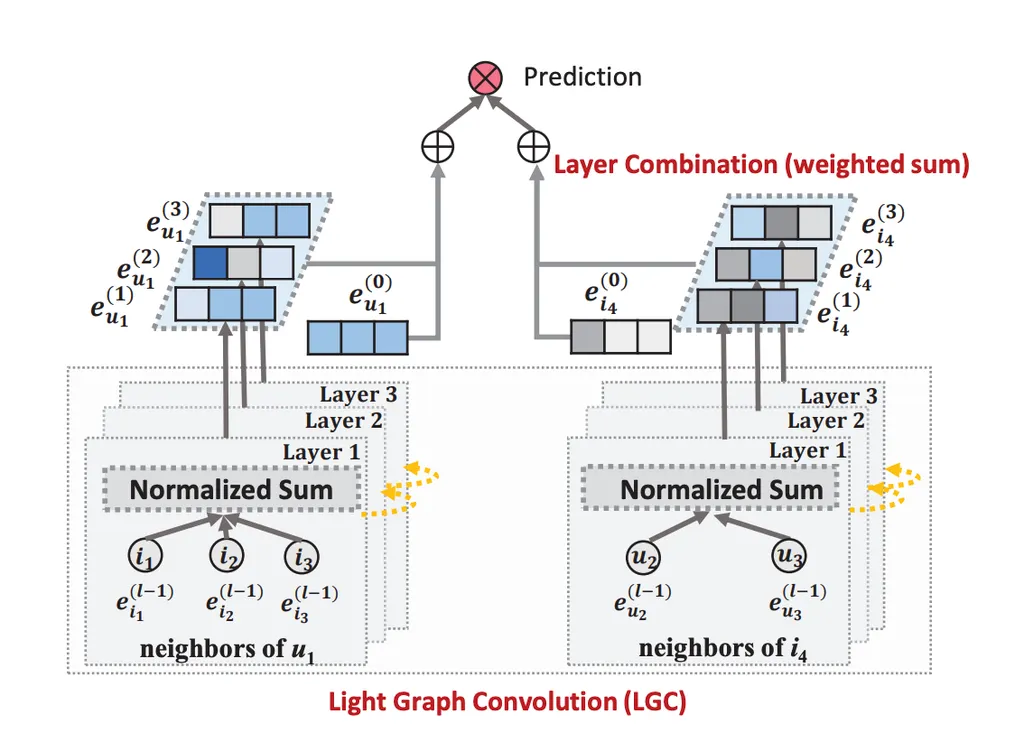

(4) GNN 활용 사례: 핀터레스트, traffic; 한 장소에서 다른 장소까지 얼마나 걸리는지 등

(5) GNN 장단점
* 장점
  1. 고차원 협업 시그널 포착: 나와 취향이 비슷한 사용자들, 내가 본 아이템의 연관 아이템 정보를 직접 반복해서 반영 가능
  2. 정형화되지 않은 데이터 학습 가능: 관계를 학습하므로
  3. cold start 문제 완화 가능: 이웃 관계 활용해 신규 사용자의 임베딩 생성

* 단점
  1. 과평탄화(over-smothing)문제: 모든 노드의 임베딩이 같은 값으로 수렴하는 현상. 메시지 전달을 반복해 레이어가 많아질수록 노드간 임베딩이 비슷해질 수 있다.
  2. 과압축 문제: GNN의 층이 깊어질수록 집계하는 이웃의 범위가 기하급수적으로 커지는데, 고정된 크기의 벡터 하나에 모두 압축하려면 정보 손실됨
  3. 계산 복잡도 증가
  4. 해석 어려움: 순서 반영이 안됨

#### 2.3 Transformer 기반 추천 시스템
: 순차적 정보를 다루는데 한계가 있는 CF와 GNN 모델의 대안으로 고안됨. 사용자의 행동 시퀀스를 언어처럼 이해하고 다음 행동을 예측할 수 있기 때문

* 시간 순서나 거리에 얽매이지 않고, 전체 시퀀스 내에서 현재 의도와 가장 관련성이 높은 핵심 문맥을 주목해 예측함.
* 핵심: Self-Attention
  + 시퀀스 내 모든 아이템 간의 관계를 거리에 상관없이 동시 계산
  + Attention Score 계산 -> softmax -> 가중치로 변환 -> 각 아이템의 value에 곱하여 모두 더함 (가중 평균) => 문맥 반영한 벡터 생성됨

* Transformer 기반 주요 추천 시스템 모델
   1. SASRec (Self-Attention Sequential Recommendation)
      * 방식: 단방향 어텐션(과거의 아이템들만 참조)
      * 목표: 다음 아이템 예측
      * 문제점: 계산량 많고 단방향성 => BERT4rec 등장

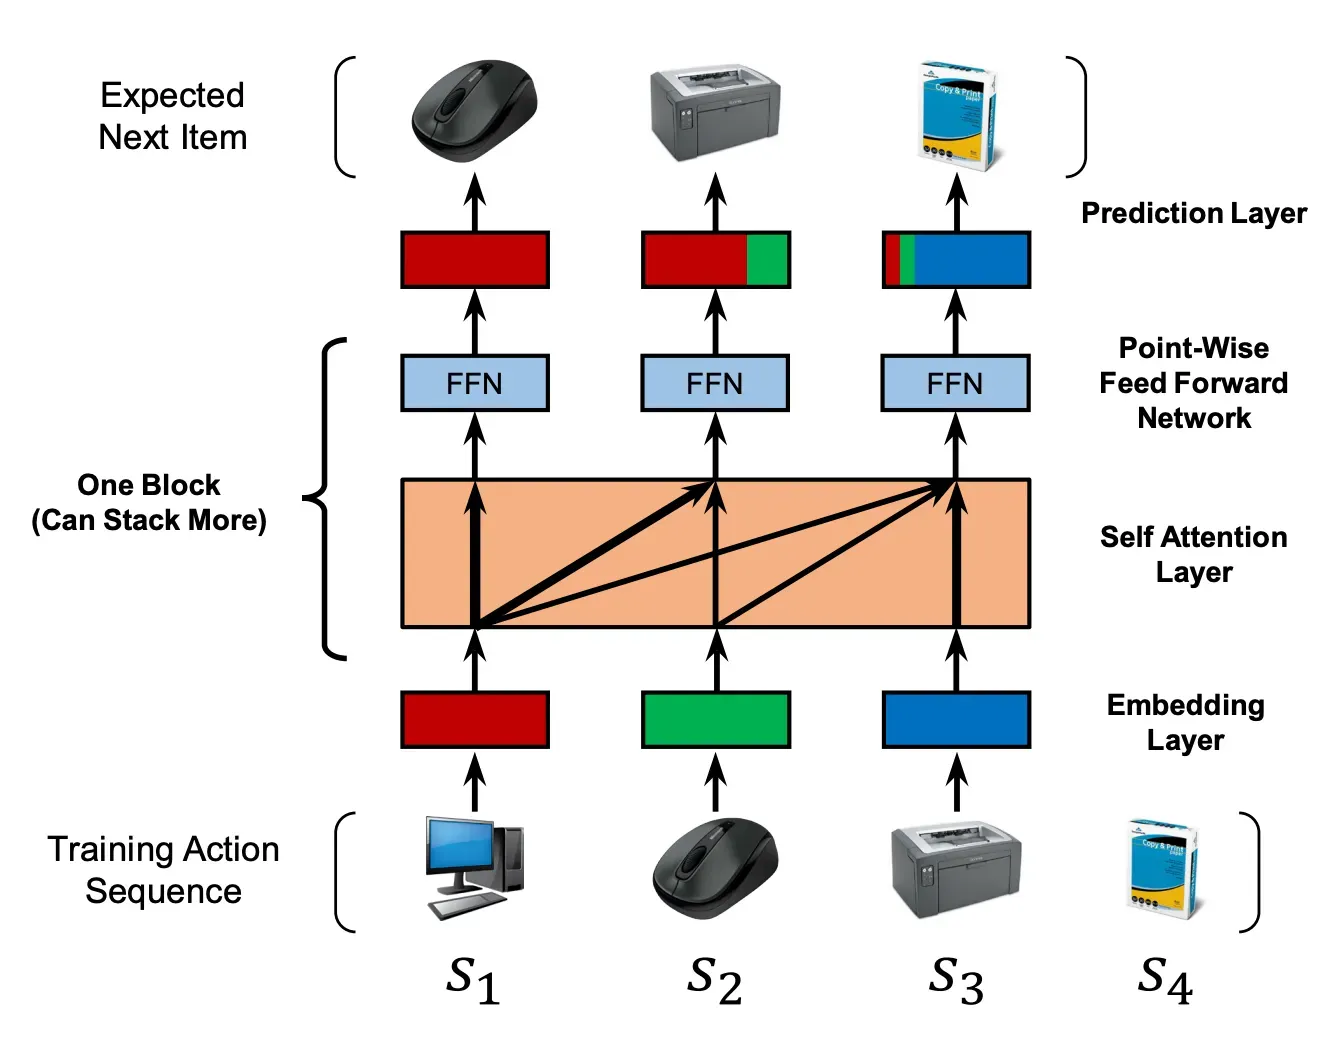

2. BERT4Rec (BERT for Recommendation)
   * 방식: 양방향 어텐션 (BERT)과 유사
   * 목표: 시퀀스 내 가려진 아이템 예측 ([MASK])
   * 특징: 아이템의 양방향 문맥 (과거와 미래)모두 고려, 시퀀스 전체의 선호도 파악하는데 초점이 맞춰짐

### 최신 트렌드: LLM
* 관점의 전환: 추천을 랭킹 문제가 아닌 언어 문제로 푼다 (의미 기반 추천)
* 새로운 가능성: LLM은 문맥을 이해할 수 있으므로 평점이 없는 새로운 아이템도 빠르게 추천 대상에 포함시킬 수 있다. -> cold start 문제 완화
* 모델

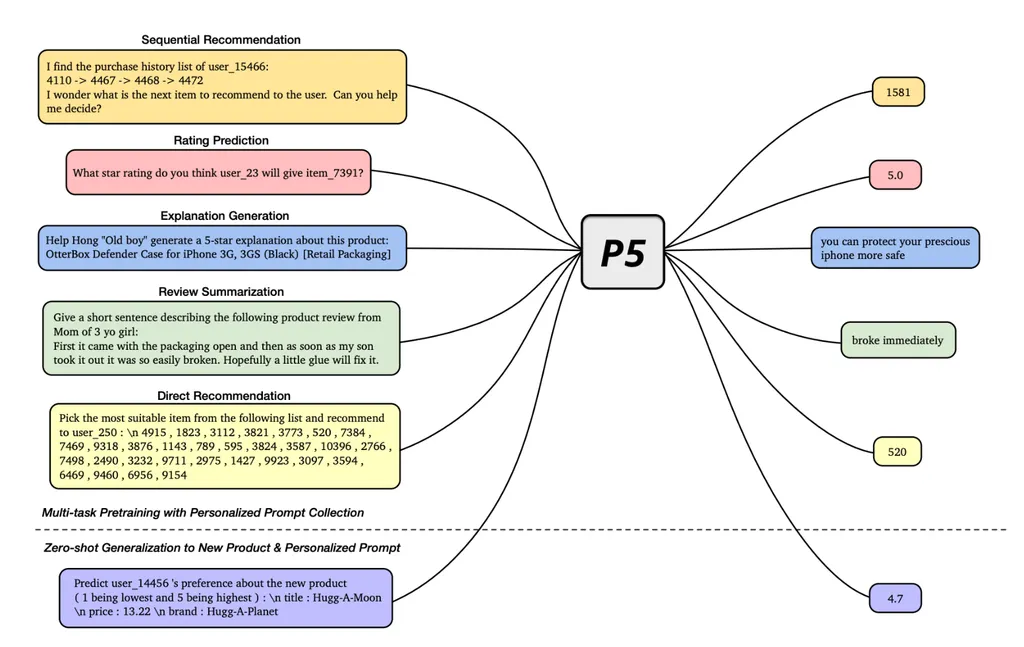

> * P5: 모든 추천 과제(랭킹, 다음 아이템 예측, 설명 생성)를 LLM이 풀 수 있도록 하나의 거대한 텍스트 프롬프트 문제로 통일시킨 모델

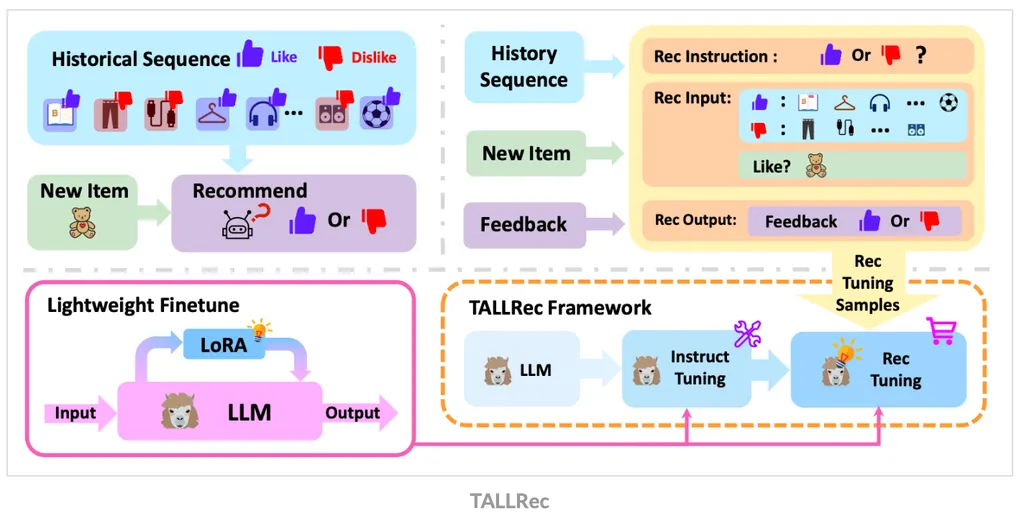

> * TALLRec: P5처럼 처음부터 다 학습시키긴 비싸니까, 이미 잘 만들어진 범용 LLM을 추천 작업에 맞게 효율적 튜닝 하는 프레임워크

### 현업의 고민: 책임감 있는 AI

1. 인기 편향: 추천시스템이 소수의 인기 아이템을 과도 노출하는 반면, 비인기 아이템이 관심을 받지 못하는 현상
2. 설명 가능성(XAI): 블랙박스 문제로 왜 이걸 추천했는지 설명할 수 없음.     
=> 성능만 좋은 모델이 아닌 편향과 공정성을 고려하고 설명 가능성을 제공하는 모델 필요

* 현업에서는 딥러닝이 너무 비싸므로, 1단계엔 선형 모델로 후보군을 빠르게 생성하고 2단계로 후보군 중 딥러닝을 통해 정교한 순위를 매긴다.